In [1]:
from IPython.display import display, Markdown, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PSS-paths-for-case-1-(ABA/RD29)" data-toc-modified-id="PSS-paths-for-case-1-(ABA/RD29)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PSS paths for case 1 (ABA/RD29)</a></span><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Description</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Library-import" data-toc-modified-id="Library-import-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Library import</a></span></li><li><span><a href="#Hany-functions" data-toc-modified-id="Hany-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Hany functions</a></span></li><li><span><a href="#Path-and-parameter-definitions" data-toc-modified-id="Path-and-parameter-definitions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Path and parameter definitions</a></span></li><li><span><a href="#Load-PSS" data-toc-modified-id="Load-PSS-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Load PSS</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Filtering</a></span></li></ul></li><li><span><a href="#Path-extraction" data-toc-modified-id="Path-extraction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Path extraction</a></span><ul class="toc-item"><li><span><a href="#ABA--->-RD29" data-toc-modified-id="ABA--->-RD29-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ABA --&gt; RD29</a></span></li><li><span><a href="#JA--->-RD29" data-toc-modified-id="JA--->-RD29-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>JA --&gt; RD29</a></span></li><li><span><a href="#SA--->-RD29" data-toc-modified-id="SA--->-RD29-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>SA --&gt; RD29</a></span></li></ul></li><li><span><a href="#Cytoscape" data-toc-modified-id="Cytoscape-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cytoscape</a></span><ul class="toc-item"><li><span><a href="#Load-the-PSS-network-into-Cytoscape" data-toc-modified-id="Load-the-PSS-network-into-Cytoscape-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load the PSS network into Cytoscape</a></span></li><li><span><a href="#Extract-subnetworks-in-Cytoscape" data-toc-modified-id="Extract-subnetworks-in-Cytoscape-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Extract subnetworks in Cytoscape</a></span><ul class="toc-item"><li><span><a href="#The-edge-induced-network" data-toc-modified-id="The-edge-induced-network-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>The edge induced network</a></span></li><li><span><a href="#The-node-induced-network" data-toc-modified-id="The-node-induced-network-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>The node induced network</a></span></li><li><span><a href="#Neighbours" data-toc-modified-id="Neighbours-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Neighbours</a></span></li><li><span><a href="#Additional-filtering-of-the-neighbours" data-toc-modified-id="Additional-filtering-of-the-neighbours-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Additional filtering of the neighbours</a></span></li></ul></li></ul></li></ul></div>

# PSS paths for case 1 (ABA/RD29)

## Description

This notebook contains the analysis of PSS for the first use case of the SKM publication. 

Experimental results showed that ABA is able to induce expression of RD29 in both arabidopsis and potato plants. However, the addition of SA or JA showed attenuation of this induction (while alone they had no effect). 

Here, we interogate the PSS network of stress signalling to identify potential points of intersection between the ABA activation of RD29 and SA or JA pathways, to identify potential mechanistic explainations of the observed experimental results. 


# Setup

## Library import
We import all the required Python libraries

The non-default libries are networkX (https://networkx.org/) and py4cytoscape (https://py4cytoscape.readthedocs.io/, only necessary if you wish to view the results in Cytoscape). 

You will also need the skm-tools package provided in the same repository as this notebook. 

In [2]:
import sys
from pathlib import Path
from datetime import datetime
from IPython.display import Markdown, display

import networkx as nx

In [3]:
from importlib import reload

The following allows us to import functions from the skm-tools package. 
Note the relative path to the folder containing the 
"skm-tools" directory. 


In [5]:
sys.path.append("../../")
from skm_tools import load_networks, pss_utils, cytoscape_utils

## Hany functions

In [6]:
# allows viewing colour codes within a notebook
def swatches(colors, sep=' ', width=6):
    display(Markdown(sep.join(
        f'<span style="font-family: monospace">{color} <span style="color: {color}">{chr(9608)*width}</span></span>'
        for color in colors
    )))    

In [9]:
today = datetime.today().strftime('%Y.%m.%d'); today

'2023.09.08'

## Path and parameter definitions

In [10]:
base_dir = Path("./")
data_dir = base_dir / "data"
output_dir = base_dir / "output"

## Load PSS

To obtain the exact results of the article, download PSS-v1.0.0 from [skm.nib.si/downloads](https://skm.nib.si/downloads), and adjust the below paths accordingly. 
Otherwise, this code will use the latest live PSS instance. 


In [12]:
pss_edge_path = data_dir / f"rxn-edges-public-{today}.tsv"
pss_node_path = data_dir / f"rxn-nodes-public-{today}.tsv"

In [13]:
g = load_networks.pss_to_networkx(
    edge_path=pss_edge_path, 
    node_path=pss_node_path
)

print(f"\nNumber of nodes: {g.number_of_nodes()}\nNumber of edges: {g.number_of_edges()}")


Number of nodes: 528
Number of edges: 893


We can draw the networks using networkX functions:

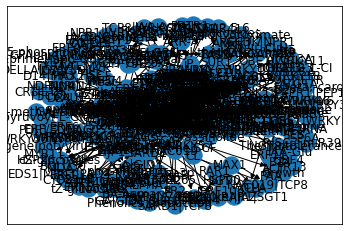

In [14]:
nx.draw_networkx(
    g, 
    labels = {n:d['display_label'] for n, d in g.nodes(data=True)}
)

But since NetworkX is not primarily a graph drawing package, instead of restyling this image we will use Cytoscape, as demonstrated in the last section. 

## Filtering

PSS contains some processes that are not relevent to this study, such as viral proteins (Foreign nodes) and FunctionalClusters that do not include either arabidopsis or potato functional homologues. 

Here, we remove them from the network. 

In [15]:
# see the types of nodes present
set([data['node_type'] for n, data in g.nodes(data=True)])

{'Complex',
 'ForeignAbiotic',
 'ForeignCoding',
 'ForeignEntity',
 'ForeignNonCoding',
 'Metabolite',
 'PlantAbstract',
 'PlantCoding',
 'PlantNonCoding',
 'Process'}

In [16]:
# Define the types we want to keep
keep_types = [
    'Complex',
    'Condition',
    'ForeignAbiotic',
    'Metabolite',
    'PlantAbstract',
    'PlantCoding',
    'PlantNonCoding',
    'Process'
]

In [17]:
# Define the species we want to keep
species = ['ath', 'stu']

In [18]:
# Use the util function to filter PSS
removed = pss_utils.filter_pss_nodes(g, 
                                     node_types=keep_types, 
                                     species=species, 
                                     remove_isolates=True
)

Removed 77 nodes from network.


You can inspect the `removed` object to see the nodes that were removed, 
and the reasons for the removal

In [19]:
print(f"\nNumber of nodes: {g.number_of_nodes()}\nNumber of edges: {g.number_of_edges()}")


Number of nodes: 451
Number of edges: 707


# Path extraction

First we identify the nodes of interest.

In [20]:
ABA = [x for x,y in g.nodes(data=True) if y['name']=="ABA"][0]
RD29 = [x for x,y in g.nodes(data=True) if y['short_name']=="RD29"][0]
JA = [x for x,y in g.nodes(data=True) if y['name']=="JA"][0]
SA = [x for x,y in g.nodes(data=True) if y['name']=="SA"][0];

print(ABA)
print(RD29)
print(JA)
print(SA)

ABA
RD29[AT5G52300,AT5G52310,SOTUB03G014340.1.1]
JA
SA


We use the networkx function `all_shortest_paths` to find paths between our nodes of interest:
    
* From ABA to RD29
* From JA to RD29
* From SA to RD29

## ABA --> RD29

In [21]:
ABA_RD29_paths = [p for p in nx.all_shortest_paths(g, source=ABA, target=RD29)]
ABA_RD29_paths

[['ABA',
  'PYL[AT1G01360,AT2G40330]',
  'PP2C[AT3G11410,SOLTU.DM.03G012480.1,SOLTU.DM.06G031720.1,SOTUB03G021270.1.1,SOTUB06G032210.1.1]',
  'SNRK2[AT1G10940,AT1G78290,AT4G33950,SOTUB02G032470.1.1]',
  'AREB/ABF[AT1G45249,AT1G49720,AT3G19290,AT4G34000]',
  'RD29[AT5G52300,AT5G52310,SOTUB03G014340.1.1]']]

## JA --> RD29

In [22]:
JA_paths = [p for p in nx.all_shortest_paths(g, source=JA, target=RD29)]
JA_paths

[['JA',
  'JA-Ile',
  'COI1|JA-Ile|SCF',
  'JAZ[AT1G17380,AT1G19180,AT1G30135,AT1G48500,AT1G70700,AT1G72450,AT1G74950,AT2G34600,AT3G17860,AT3G43440,AT5G13220,AT5G20900]',
  'MYC2[AT1G32640]',
  'PYL[AT1G01360,AT2G40330]',
  'PP2C[AT3G11410,SOLTU.DM.03G012480.1,SOLTU.DM.06G031720.1,SOTUB03G021270.1.1,SOTUB06G032210.1.1]',
  'SNRK2[AT1G10940,AT1G78290,AT4G33950,SOTUB02G032470.1.1]',
  'AREB/ABF[AT1G45249,AT1G49720,AT3G19290,AT4G34000]',
  'RD29[AT5G52300,AT5G52310,SOTUB03G014340.1.1]']]

## SA --> RD29

In [23]:
SA_paths = [p for p in nx.all_shortest_paths(g, source=SA, target=RD29)]
SA_paths

[['SA',
  'NPR1[AT1G64280]',
  'MYC2[AT1G32640]',
  'PYL[AT1G01360,AT2G40330]',
  'PP2C[AT3G11410,SOLTU.DM.03G012480.1,SOLTU.DM.06G031720.1,SOTUB03G021270.1.1,SOTUB06G032210.1.1]',
  'SNRK2[AT1G10940,AT1G78290,AT4G33950,SOTUB02G032470.1.1]',
  'AREB/ABF[AT1G45249,AT1G49720,AT3G19290,AT4G34000]',
  'RD29[AT5G52300,AT5G52310,SOTUB03G014340.1.1]']]

# Cytoscape 

First open the Cytoscape application. Then the following cell will load the required library and and make sure you can connect to the Cytoscape application. 

More py4cytoscape documentation is here: https://py4cytoscape.readthedocs.io/

In [24]:
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.0',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

We set the Cytoscape collection name for this notebook. 

In [25]:
COLLECTION = f"Case 1: PSS ({today})"
COLLECTION

'Case 1: PSS (2023.09.08)'

We're going to highlight the identified paths in Cytoscape, and we set the colours here:

In [26]:
ABA_COLOUR = "#dc1c1c"
JA_COLOUR = "#66a61e"
SA_COLOUR = "#34858d"

swatches([ABA_COLOUR, JA_COLOUR, SA_COLOUR])

<span style="font-family: monospace">#dc1c1c <span style="color: #dc1c1c">██████</span></span> <span style="font-family: monospace">#66a61e <span style="color: #66a61e">██████</span></span> <span style="font-family: monospace">#34858d <span style="color: #34858d">██████</span></span>

## Load the PSS network into Cytoscape

We load the network, set a visual style, and apply the CoSE layout.

With skm-tools, we provide a default style for PSS, colouring the nodes bypathway.

Returned is the ID of the network view in Cytoscape.

In [27]:
pss_network_suid = p4c.networks.create_network_from_networkx(g, title="Complete PSS", collection=COLLECTION)
cytoscape_utils.apply_builtin_style(pss_network_suid, 'pss')
p4c.layout_network("cose", network=pss_network_suid)
pss_network_suid

Applying default style...
Applying preferred layout
Applied PSS-default to 128


128

Now we're going to highlight the paths we identified in the network by applying style bypasses.

We don't want to recolour already highlighted path elements, so we keep track of them here:

In [28]:
done_nodes, done_edges = [], []

First we highligh the aba path(s), and add the coloured elements to the done lists. You will see the Cytoscaep session incrementally update, as new node and edge style are applied. 

In [29]:
for p in ABA_RD29_paths:
    done_nodes_now, done_edges_now = cytoscape_utils.highlight_path(p, ABA_COLOUR, skip_nodes=done_nodes, skip_edges=done_edges)
    done_nodes += done_nodes_now
    done_edges += done_edges_now

Now we do the JA and SA pathways:

In [30]:
for p in JA_paths:
    done_nodes_now, done_edges_now = cytoscape_utils.highlight_path(p, JA_COLOUR, skip_nodes=done_nodes, skip_edges=done_edges)
    done_nodes += done_nodes_now
    done_edges += done_edges_now

In [31]:
for p in SA_paths:
    done_nodes_now, done_edges_now = cytoscape_utils.highlight_path(p, SA_COLOUR, skip_nodes=done_nodes, skip_edges=done_edges)
    done_nodes += done_nodes_now
    done_edges += done_edges_now

At this point, the Cytoscape session has a network view of the filtered PSS, and highlighting of the paths we extracted from our targeted searches. 

## Extract subnetworks in Cytoscape

Properly inspecting the identified paths is a bit hard within the complete network, so here we pull out the subnetworks of and surrounding the paths. 


### The edge induced network
The first, and smallest network, is created by extracting only the edges that are present on the paths. 

In [32]:
network_edge_induced_suid = cytoscape_utils.subnetwork_edge_induced_from_paths(
    paths=ABA_RD29_paths + JA_paths + SA_paths,
    g=g,
    parent_suid=pss_network_suid,
    name="identified paths (edge induced)",
)

We apply a new layout to this subnetwork

In [33]:
_ = p4c.layouts.layout_network('cose', network=network_edge_induced_suid)

### The node induced network

Now we extract the network based on the nodes along the paths, meaning any edges between those nodes that are not on the paths are also extracted. 

In [34]:
nodes = list(set([y for x in ABA_RD29_paths + JA_paths + SA_paths for y in x]))

In [35]:
network_node_induced_suid = cytoscape_utils.subnetwork_node_induced(
    nodes=nodes,
    parent_suid=pss_network_suid,
    name="identified paths (node induced)",
)

Instead of applying a network layout algorithm, we can copy the layout from the previous subnetwork. 

In [36]:
_ = p4c.layouts.layout_copycat(
    network_edge_induced_suid, 
    network_node_induced_suid
)

### Neighbours

For more context around our paths, we can include the first neighbours in the view. We can use the Cytoscape first neighbour selection functionality. 

In [37]:
network_neighbours_suid = cytoscape_utils.subnetwork_neighbours(
    nodes=nodes,
    parent_suid=pss_network_suid,
    name="identified paths + 1st neighbours",
)

In [38]:
_ = p4c.layouts.layout_network('cose', network=network_neighbours_suid)

This network (with manual layout improvements and removal of unrelated nodes) is shown in Figure 3 of the article. 

### Additional filtering of the neighbours

There are many neighbours displayed now, and we are perhaps only interested in the ones that are connected to at least two of the original path nodes, so we can make a filter using networkX neighbour functions. 

In [39]:
filtered_neighbours = []
for n in g.nodes():
    if (len([x for x in nx.MultiGraph(g).neighbors(n) if (x in done_nodes)]) > 1) and (n not in done_nodes):
        filtered_neighbours.append(n)

In [40]:
network_neighbours_filtered_suid = cytoscape_utils.subnetwork_node_induced(
    nodes=nodes+filtered_neighbours,
    parent_suid=pss_network_suid,
    name="identified paths + 1st neighbours (filtered)",
)

In [41]:
p4c.layouts.layout_copycat(
    network_neighbours_suid, 
    network_neighbours_filtered_suid
)

{'mappedNodeCount': 18, 'unmappedNodeCount': 0}

Save the Cytoscape session:

In [42]:
p4c.session.save_session("./output/case-study-1-PSS-network-analysis.cys")

{}

In [39]:
# END